### Building your network

In [1]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

In [2]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

### Data preprocessing
Using ImageDataGenerator to read images from directories

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "../dataset_splits/train"
validation_dir = "../dataset_splits/validation"

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 7245 images belonging to 6 classes.
Found 1355 images belonging to 6 classes.


### Fitting the model using a batch generator

In [5]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=105,
    validation_data=validation_generator,
    validation_steps=43)

Epoch 1/105
230/230 [==============================] - 82s 355ms/step - loss: 1.2131 - acc: 0.5860 - val_loss: 0.7177 - val_acc: 0.7815
Epoch 2/105
230/230 [==============================] - 80s 347ms/step - loss: 0.6967 - acc: 0.8005 - val_loss: 0.4877 - val_acc: 0.8576
Epoch 3/105
230/230 [==============================] - 79s 345ms/step - loss: 0.5201 - acc: 0.8564 - val_loss: 0.4820 - val_acc: 0.8679
Epoch 4/105
230/230 [==============================] - 80s 346ms/step - loss: 0.4844 - acc: 0.8768 - val_loss: 0.3834 - val_acc: 0.9129
Epoch 5/105
230/230 [==============================] - 79s 345ms/step - loss: 0.3990 - acc: 0.9094 - val_loss: 0.3665 - val_acc: 0.9114
Epoch 6/105
230/230 [==============================] - 79s 345ms/step - loss: 0.3940 - acc: 0.9099 - val_loss: 0.3047 - val_acc: 0.9402
Epoch 7/105
230/230 [==============================] - 80s 347ms/step - loss: 0.3588 - acc: 0.9241 - val_loss: 0.2880 - val_acc: 0.9550
Epoch 8/105
230/230 [===========================

Epoch 61/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1261 - acc: 0.9855 - val_loss: 0.1144 - val_acc: 0.9852
Epoch 62/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1079 - acc: 0.9870 - val_loss: 0.1415 - val_acc: 0.9815
Epoch 63/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1298 - acc: 0.9835 - val_loss: 0.1423 - val_acc: 0.9793
Epoch 64/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1056 - acc: 0.9901 - val_loss: 0.1373 - val_acc: 0.9786
Epoch 65/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1179 - acc: 0.9880 - val_loss: 0.1483 - val_acc: 0.9779
Epoch 66/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1187 - acc: 0.9841 - val_loss: 0.1793 - val_acc: 0.9683
Epoch 67/105
230/230 [==============================] - 79s 342ms/step - loss: 0.1081 - acc: 0.9895 - val_loss: 0.1383 - val_acc: 0.9756
Epoch 68/105
230/230 [===================

### Saving the model

In [6]:
model.save('./saved model/tomato_small_1.h5')

### Displaying curves of loss and accuracy during training

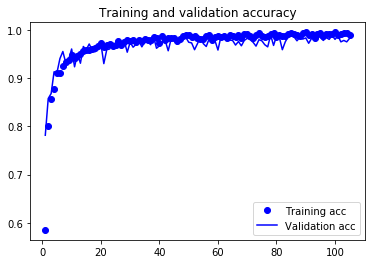

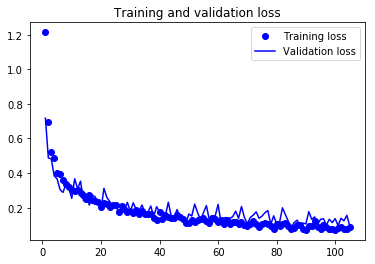

In [7]:
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Train the model on all samples (Training and Validation)

In [8]:
test_dir = "../dataset_splits/test"

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


Found 448 images belonging to 6 classes.


In [9]:
score = model.evaluate_generator(test_generator, steps=40, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [10]:
print(score)

[0.06711883898824453, 0.9984375]
